In [6]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [7]:
cd '/Users/aidasaglinskas/Desktop/BC-MRI-AE/'

[Errno 2] No such file or directory: '/Users/aidasaglinskas/Desktop/BC-MRI-AE/'
/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks


In [8]:
import pickle 
import numpy as np
from helper_funcs import *

In [9]:
embed = pickle.load(open('../Data/embedded_data_noreducer.pickle','rb'))

In [10]:
embed['sfari_embedding_vae'].shape

(51, 32)

In [14]:
data = np.load('../Data/latent_vecs3.npz')
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
list(data.keys())
patients = df['DxGroup'].values==1

In [15]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [17]:
plot_data = embed['sl_space_abide']
plot_data = plot_data[plot_data[:,0]<np.sort(plot_data[:,0])[50],:]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


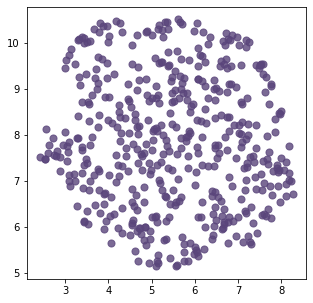

In [18]:
plt.figure(figsize=(5,5))
embedded_data = embed
c_abide = np.array([90,69,123])/255
c_sfari = np.array([156,111,65])/255
#plt.subplot(1,3,1)
msize = 50
plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1],c=c_abide,alpha=.8,s=msize)
#plt.scatter(embedded_data['sl_space_sfari'][:,0],embedded_data['sl_space_sfari'][:,1],c=c_abide,alpha=.8,s=msize)

#plt.savefig('/Users/aidasaglinskas/Desktop/bars/sl_space.pdf',dpi=300)

In [19]:
def get_corner(cc='L'):
    plot_data = embedded_data['sl_space_abide']
    plot_data.min(axis=0)
    plot_data.mean(axis=0)

    if cc=='L':
        targ = np.array([plot_data.min(axis=0)[0],plot_data.mean(axis=0)[1]]) # LEFT
    elif cc=='R':
        targ = np.array([plot_data.max(axis=0)[0],plot_data.mean(axis=0)[1]]) #RIGHT
    elif cc=='B':
        targ = np.array([plot_data.mean(axis=0)[0],plot_data.min(axis=0)[1]]) #Bottom
    elif cc=='T':
        targ = np.array([plot_data.mean(axis=0)[0],plot_data.max(axis=0)[1]]) # TOP

    diff = ((plot_data - targ)**2).sum(axis=1)

    I = np.argsort(diff)
    plot_data = plot_data[I,:]
    plot_data = plot_data[0:50,:]
    return plot_data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


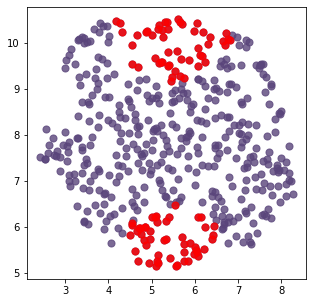

In [20]:
plt.figure(figsize=(5,5))
embedded_data = embed
c_abide = np.array([90,69,123])/255
c_sfari = np.array([156,111,65])/255
#plt.subplot(1,3,1)
msize = 50

plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1],c=c_abide,alpha=.8,s=msize)
plot_data = get_corner('B')
plt.scatter(plot_data[:,0],plot_data[:,1],c='r',alpha=.8,s=msize)
plot_data = get_corner('T')
plt.scatter(plot_data[:,0],plot_data[:,1],c='r',alpha=.8,s=msize)
#plt.savefig('/Users/aidasaglinskas/Desktop/bars/sl_space_ycomp.pdf',dpi=300)




# plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1],c=c_abide,alpha=.8,s=msize)
# plot_data = get_corner('L')
# plt.scatter(plot_data[:,0],plot_data[:,1],c='r',alpha=.8,s=msize)
# plot_data = get_corner('R')
# plt.scatter(plot_data[:,0],plot_data[:,1],c='r',alpha=.8,s=msize)
# plt.savefig('/Users/aidasaglinskas/Desktop/bars/sl_space_xcomp.pdf',dpi=300)


In [21]:
embed['embedding_bg'].shape

(470, 16)

Text(0, 0.5, 'Latent Dim 2 (UMAP, A.U.)')

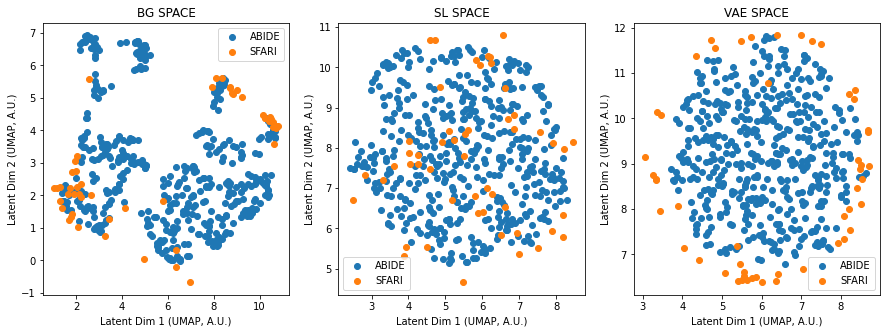

In [22]:
plt.figure(figsize=(15,5))
embedded_data = embed
plt.subplot(1,3,1)
plt.scatter(embedded_data['bg_space_abide'][:,0],embedded_data['bg_space_abide'][:,1])
plt.scatter(embedded_data['bg_space_sfari'][:,0],embedded_data['bg_space_sfari'][:,1])
#plt.scatter(bg_space_sfari[:,0],bg_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('BG SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,2)
plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1])
plt.scatter(embedded_data['sl_space_sfari'][:,0],embedded_data['sl_space_sfari'][:,1])
#plt.scatter(sl_space_sfari[:,0],sl_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('SL SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,3)
plt.scatter(embedded_data['vae_space_abide'][:,0],embedded_data['vae_space_abide'][:,1])
plt.scatter(embedded_data['vae_space_sfari'][:,0],embedded_data['vae_space_sfari'][:,1])
#plt.scatter(vae_space_sfari[:,0],vae_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('VAE SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

#plt.savefig('/mmfs1/data/aglinska/figures/spaces_abide_sfari.png',dpi=300)

In [23]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [24]:
bg_space_abide = embed['bg_space_abide']
sl_space_abide = embed['sl_space_abide']
vae_space_abide = embed['vae_space_abide']

sl_space_sfari = embed['sl_space_sfari']
bg_space_sfari = embed['bg_space_sfari']
vae_space_sfari = embed['vae_space_sfari']

In [25]:
bg_space_sfari.shape

(51, 2)

In [26]:
sfari = sl_space_sfari
abide = sl_space_abide
sfari.shape

(51, 2)

In [27]:
n_sfari = sfari.shape[0]
n_abide = abide.shape[0]

In [28]:
import scipy
#dist = scipy.spatial.distance.pdist
dist = scipy.spatial.distance.mahalanobis

In [29]:
bg_abide = embed['embedding_bg']
sl_abide = embed['embedding_sl']
vae_abide = embed['embedding_vae']

bg_sfari = embed['sfari_embedding_bg']
sl_sfari = embed['sfari_embedding_sl']
vae_sfari = embed['sfari_embedding_vae']

In [30]:
def mh_dist(sfari_space,abide_space):
    u = sfari_space
    v = abide_space
    vi = np.cov(v.transpose())
    vi = np.linalg.inv(vi)

    md = np.zeros((u.shape[0],v.shape[0]))
    for s in range(md.shape[0]):
        for a in range(md.shape[1]):
            md[s,a] = dist(u[s,:],v[a,:],vi)
    return md

In [31]:
import scipy

In [32]:
ttest = scipy.stats.ttest_rel

In [33]:
bg_mh = mh_dist(bg_sfari,bg_abide) / np.sqrt(16)
sl_mh = mh_dist(sl_sfari,sl_abide) / np.sqrt(16)
vae_mh = mh_dist(vae_sfari,vae_abide) / np.sqrt(32)

In [34]:
def pretty_ttest(vec1,vec2):
    t,p = ttest(vec1,vec2)
    df = len(vec1)-1
    if p < .001:
        print(f't({df}) = {t:.3f}, p < .001')
    else:
        print(f't({df}) = {t:.3f}, p = {p:.3f}')

In [35]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [36]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [37]:
list(data.keys())

['salient_vec_abide',
 'background_vec_abide',
 'vae_vec_abide',
 'salient_vec_sfari',
 'background_vec_sfari',
 'vae_vec_sfari']

In [38]:
%%time
v_sl = np.array([mh_dist(data['salient_vec_abide'][i,patients,:],data['salient_vec_abide'][i,~patients,:]).mean() for i in range(10)])
v_bg = np.array([mh_dist(data['background_vec_abide'][i,patients,:],data['background_vec_abide'][i,~patients,:]).mean() for i in range(10)])
v_vae = np.array([mh_dist(data['vae_vec_abide'][i,patients,:],data['vae_vec_abide'][i,~patients,:]).mean() for i in range(10)])

CPU times: user 1min 22s, sys: 57.7 s, total: 2min 19s
Wall time: 1min 11s


Text(0.5, 1.0, 'Mahalanobis Distance between SFARI and ABIDE points')

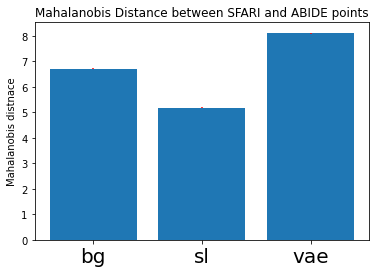

In [39]:
ys = [arr.mean() for arr in [v_sl,v_bg,v_vae]]
se = [arr.std() for arr in [v_sl,v_bg,v_vae]]
xs = np.arange(3)
plt.bar(xs,ys);
plt.errorbar(xs,ys,se,fmt='r ');
plt.xticks(xs,labels=['bg','sl','vae'],fontsize=20);
plt.ylabel('Mahalanobis distnace')
plt.title('Mahalanobis Distance between SFARI and ABIDE points')

In [40]:
%%time
ys = [bg_mh.mean(axis=1).mean(axis=0),sl_mh.mean(axis=1).mean(axis=0),vae_mh.mean(axis=1).mean(axis=0)]
se = [bg_mh.mean(axis=1).std(axis=0),sl_mh.mean(axis=1).std(axis=0),vae_mh.mean(axis=1).std(axis=0)]
xs = np.arange(3)

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 555 µs


Text(0.5, 1.0, 'Mahalanobis Distance between SFARI and ABIDE points')

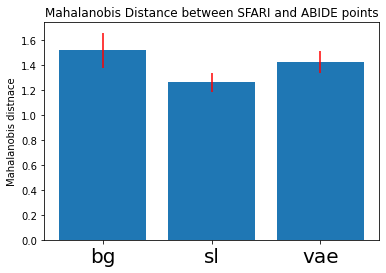

In [41]:
plt.bar(xs,ys);
plt.errorbar(xs,ys,se,fmt='r ');
plt.xticks(xs,labels=['bg','sl','vae'],fontsize=20);
plt.ylabel('Mahalanobis distnace')
plt.title('Mahalanobis Distance between SFARI and ABIDE points')

In [42]:
#dist(np.vstack((sfari[0,:],abide[0,:])),metric='mahalanobis')

Text(0, 0.5, 'BIC - lower is better')

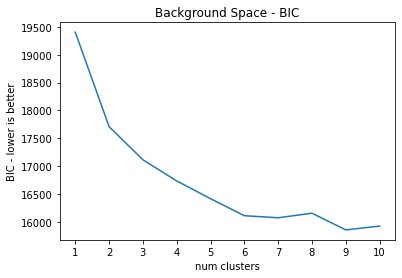

In [43]:
from sklearn.mixture import GaussianMixture as gmm
data_in = bg_abide
bic = list()
for i in range(10):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.aic(data_in))
    
plt.plot(np.arange(10),bic);
plt.xticks(np.arange(10),labels=np.arange(10)+1);
plt.title('Background Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

Text(0, 0.5, 'BIC - lower is better')

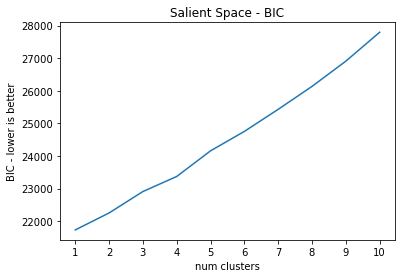

In [44]:
from sklearn.mixture import GaussianMixture as gmm
data_in = sl_abide
bic = list()
n = 10
for i in range(n):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.bic(data_in))
    
plt.plot(np.arange(n),bic);
plt.xticks(np.arange(n),labels=np.arange(n)+1);
plt.title('Salient Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

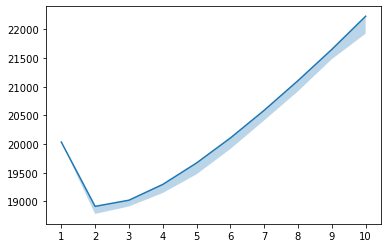

In [45]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
plt.xticks(np.arange(10),labels=np.arange(10)+1);
arr = np.array([get_bic(bg_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

ONE SAMPLE

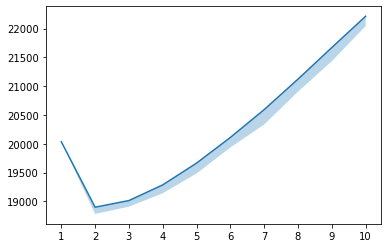

In [46]:
n = 100
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
plt.xticks(np.arange(10),labels=np.arange(10)+1);
arr = np.array([get_bic(bg_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

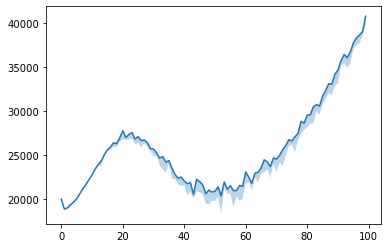

In [64]:
n = 100
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(bg_abide) for _ in range(5)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

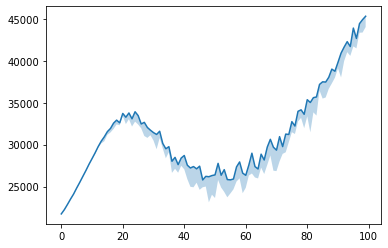

In [63]:
n = 100
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(sl_abide) for _ in range(5)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

DIFF SAMPLES

CPU times: user 10min 47s, sys: 2.97 s, total: 10min 50s
Wall time: 30.2 s


([<matplotlib.axis.XTick at 0x15553813a790>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

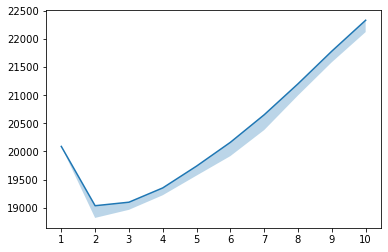

In [49]:
%%time
bg_space = data['background_vec_abide'][3,:,:][patients,:]
n = 10
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(bg_space) for _ in range(50)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)
plt.xticks(xs,labels=xs+1)

CPU times: user 11min 9s, sys: 2.87 s, total: 11min 12s
Wall time: 36.3 s


([<matplotlib.axis.XTick at 0x15539c03e0d0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

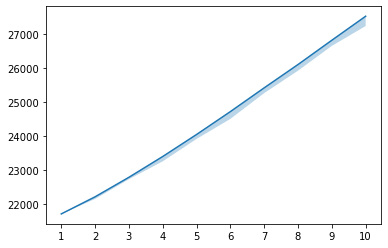

In [50]:
%%time
sl_space = data['salient_vec_abide'][5,:,:][patients,:]
n = 10
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(sl_space) for _ in range(50)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)
plt.xticks(xs,labels=xs+1)

In [51]:
from tqdm import tqdm

100%|██████████| 10/10 [00:30<00:00,  3.04s/it]


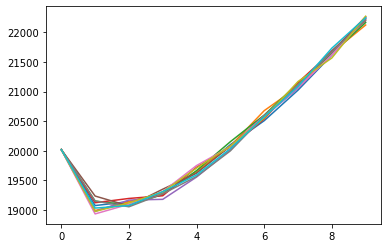

In [52]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        arr[ii,:,jj] = get_bic(data['background_vec_abide'][0,:,:][patients,:])
        
plt.plot(arr.mean(axis=2).transpose());

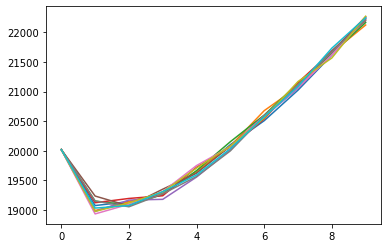

In [53]:
plt.plot(arr.mean(axis=2).transpose());

In [54]:
list(data.keys())

['salient_vec_abide',
 'background_vec_abide',
 'vae_vec_abide',
 'salient_vec_sfari',
 'background_vec_sfari',
 'vae_vec_sfari']

In [55]:
data['salient_vec_sfari'].shape

(10, 121, 16)

In [56]:
dfs = pd.read_csv('./Data/sfari_legend_S121.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Data/sfari_legend_S121.csv'

In [ ]:
cnvs = np.array([v in ['16p-deletion','16p-duplication'] for v in dfs['family_type'].values])

# HOW MANY CLUSTERS: get data

In [ ]:
data = np.load('./Data/latent_vecs100.npz')

In [ ]:
list(data.keys())
data['salient_vec_abide'].shape

In [ ]:
n = 10
i = 100
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['salient_vec_sfari'][ii,:,:][cnvs,:],data['salient_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
arr_sl = arr
#plt.plot(arr.mean(axis=2).transpose());

In [ ]:
n = 10
#i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['background_vec_sfari'][ii,:,:][cnvs,:],data['background_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
arr_bg = arr
#plt.plot(arr.mean(axis=2).transpose());

In [ ]:
n = 10
#i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['vae_vec_sfari'][ii,:,:][cnvs,:],data['vae_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
arr_vae = arr
#plt.plot(arr.mean(axis=2).transpose());

# HOW MANY CLUSTERS: PLOT DATA

In [ ]:
#arr_vae[:,:,0].argmin(axis=1)+1

In [ ]:
# m = plot_mat[:,:,0].mean(axis=0)
# se_min = plot_mat[:,:,0].min(axis=0)
# se_max = plot_mat[:,:,0].max(axis=0)
# plt.plot(xs,m,'k-',linewidth=2.5)
# plt.fill_between(xs,y1=se_min,y2=se_max,alpha=.3,facecolor=[0,0,0])

In [ ]:
#plt.plot(plot_mat.mean(axis=2).transpose(),'-*',linewidth=5,alpha=.6);

In [ ]:
arr_sl[:,:,0].argmin(axis=1)+1

In [ ]:
btest = scipy.stats.binom_test

In [ ]:
btest(x=8,n=10,p=.5)

In [ ]:
btest(x=0,n=100,p=.3).round(2)

In [ ]:
((arr_sl[:,:,1].argmin(axis=1)+1)==1).mean()

In [ ]:
btest(x=88,n=100,p=.5).round(3)

In [ ]:
plot_mats = [arr_sl,arr_bg,arr_vae] 
plot_ttls = ['Salient','Background','VAE'] 
for i in range(3):
    plot_mat = plot_mats[i]
    plot_ttl = plot_ttls[i]

    xs = np.arange(n)
    figsize = np.array((185,211))/211*5
    fig,ax = plt.subplots(1,1,figsize=figsize);
    #plt.plot(plot_mat.mean(axis=2).transpose(),'-*',linewidth=5,alpha=.6);
    
    m = plot_mat[:,:,0].mean(axis=0)
    se_min = plot_mat[:,:,0].min(axis=0)
    se_max = plot_mat[:,:,0].max(axis=0)
    plt.plot(xs,m,'k-',linewidth=2.5)
    plt.fill_between(xs,y1=se_min,y2=se_max,alpha=.3,facecolor=[0,0,0])


    plt.yticks(fontsize=14,fontweight='bold');
    plt.xticks(xs,labels=xs+1,fontsize=14,fontweight='bold');
    plt.xlabel('Number of clusters',fontsize=14,fontweight='bold')
    plt.ylabel('BIC\nlower is better',fontsize=14,fontweight='bold')

    line_width = 2.5
    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(line_width)

    plt.title(plot_ttl,fontsize=14*1.5,fontweight='bold',y=1.05)
    plt.tight_layout()
    #plt.savefig(f'./Results/figures/scatterplots/opt_clusters_{plot_ttl}2.pdf',dpi=300)


In [ ]:
np.array([np.argmin(arr_vae[i,:,0])+1 for i in range(10)])

In [ ]:
plot_mats = [arr_sl,arr_bg,arr_vae] 
plot_ttls = ['Salient','Background','VAE'] 
for i in range(3):
    plot_mat = plot_mats[i]
    plot_ttl = plot_ttls[i]

    xs = np.arange(n)
    figsize = np.array((185,211))/211*5
    fig,ax = plt.subplots(1,1,figsize=figsize);
    plt.plot(plot_mat.mean(axis=2).transpose(),'-*',linewidth=5,alpha=.6);


    plt.yticks(fontsize=14,fontweight='bold');
    plt.xticks(xs,labels=xs+1,fontsize=14,fontweight='bold');
    plt.xlabel('Number of clusters',fontsize=14,fontweight='bold')
    plt.ylabel('BIC\nlower is better',fontsize=14,fontweight='bold')

    line_width = 2.5
    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(line_width)

    plt.title(plot_ttl,fontsize=14*1.5,fontweight='bold',y=1.05)
    plt.tight_layout()
    #plt.savefig(f'./Results/figures/scatterplots/opt_clusters_{plot_ttl}.pdf',dpi=300)


In [ ]:
def pretty_ttest_rel(vec1,vec2):
    import scipy
    ttest_rel = scipy.stats.ttest_rel
    t,p = ttest_rel(vec1,vec2)
    df = len(vec1)-1
    if p < .001:
        print(f't({df}) = {t:.3f}, p $<$ .001')
    else:
        print(f't({df}) = {t:.3f}, p = {p:.3f}')

In [ ]:
pretty_ttest_rel(arr_sl[:,1,0],arr_sl[:,0,0])

In [ ]:
pretty_ttest_rel(arr_bg[:,0,0],arr_bg[:,1,0])

In [ ]:
pretty_ttest_rel(arr_bg[:,1,0],arr_bg[:,2,0])

In [ ]:
pretty_ttest_rel(arr_vae[:,1,0],arr_vae[:,0,0])

In [ ]:
!date

In [ ]:
#!pip install hdbscan